# Step 1: Import Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

# Step 2: Load Dataset

In [ ]:
df=pd.DataFrame(pd.read_csv('loan_data.csv'))

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.shape

(45000, 14)

# Step 3: Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(f'{i} has: {df[i].isnull().sum()/df.shape[0]}')
  else:
    print(f'{i} is not null')

person_age is not null
person_gender is not null
person_education is not null
person_income is not null
person_emp_exp is not null
person_home_ownership is not null
loan_amnt is not null
loan_intent is not null
loan_int_rate is not null
loan_percent_income is not null
cb_person_cred_hist_length is not null
credit_score is not null
previous_loan_defaults_on_file is not null
loan_status is not null


In [ ]:
df.duplicated().sum()

np.int64(0)

# Step 4: Encoding Categorical Columns

In [ ]:
le = LabelEncoder()
df['person_education'] = le.fit_transform(df['person_education'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

In [ ]:
df= pd.get_dummies(df, columns=['person_gender', 'person_home_ownership', 'loan_intent'], drop_first=True)
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,False,False,False,True,False,False,False,True,False
1,21.0,3,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,False,False,True,False,True,False,False,False,False
2,25.0,3,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,False,False,False,False,False,False,True,False,False
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,False,False,False,True,False,False,True,False,False
4,24.0,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,True,False,False,True,False,False,True,False,False


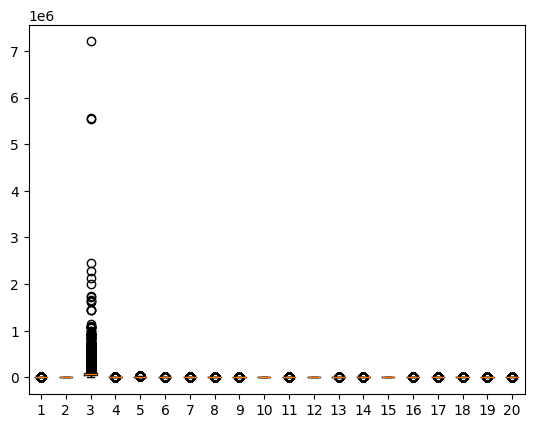

In [ ]:
plt.boxplot(df)
plt.show()

# Step 5: Exploratory Data Analysis (EDA)

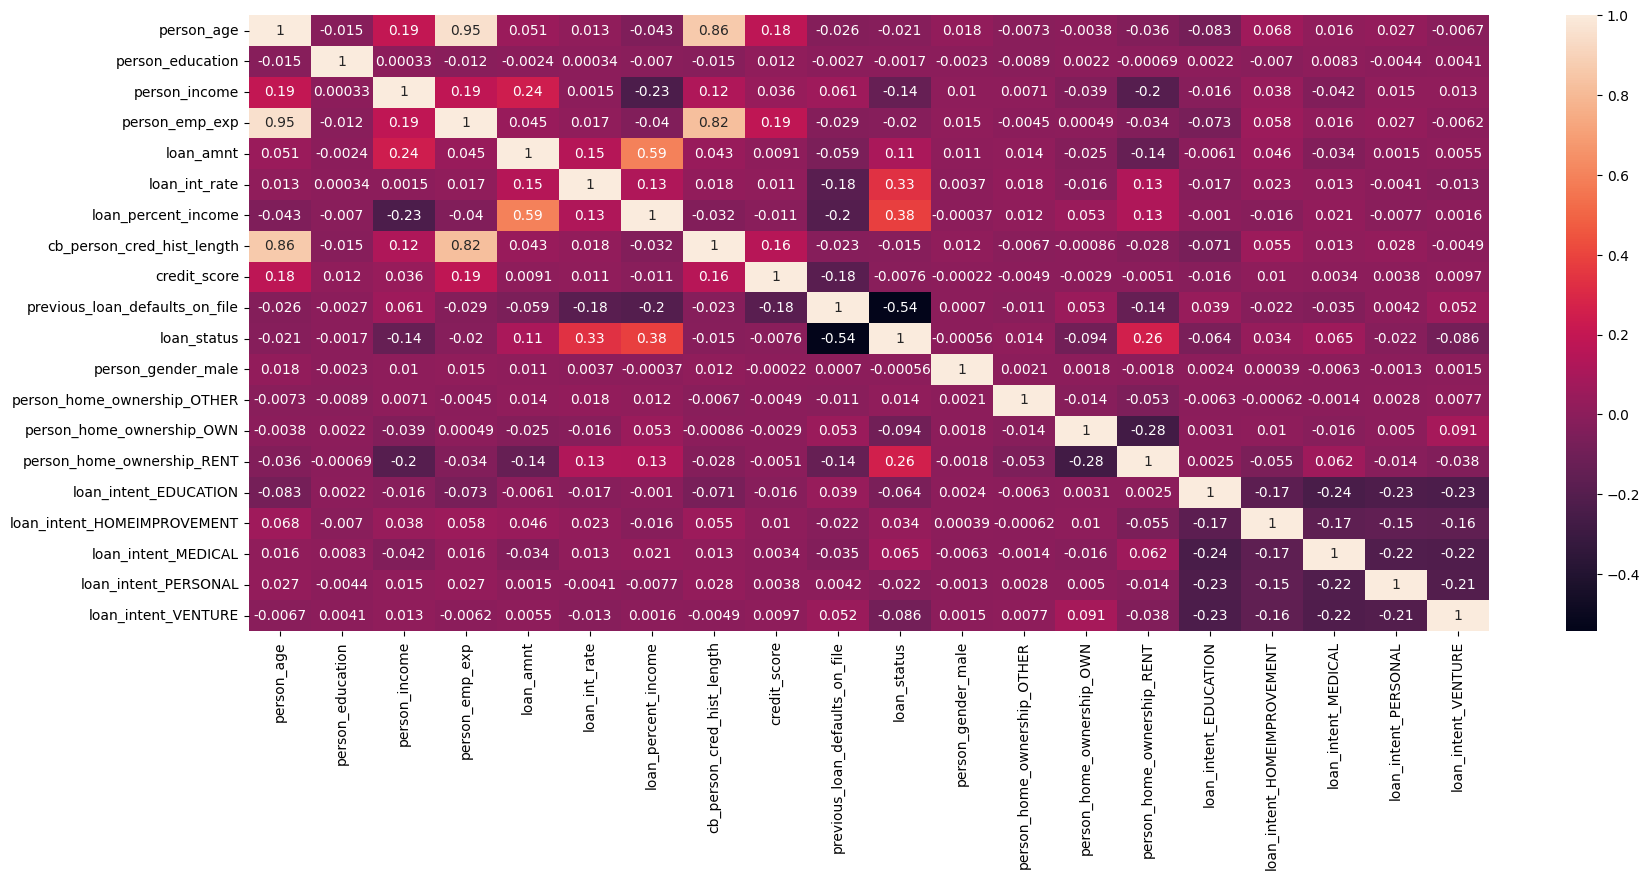

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df['loan_status'].unique()

array([1, 0])

<Axes: ylabel='count'>

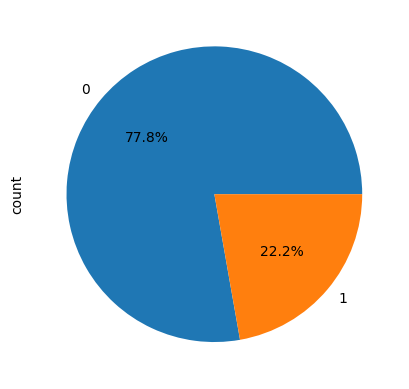

In [ ]:
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
df.columns

Index(['person_age', 'person_education', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

# Step 6: Feature Selection (X, y)

In [ ]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_education                45000 non-null  int64  
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   loan_amnt                       45000 non-null  float64
 5   loan_int_rate                   45000 non-null  float64
 6   loan_percent_income             45000 non-null  float64
 7   cb_person_cred_hist_length      45000 non-null  float64
 8   credit_score                    45000 non-null  int64  
 9   previous_loan_defaults_on_file  45000 non-null  int64  
 10  person_gender_male              45000 non-null  bool   
 11  person_home_ownership_OTHER     45000 non-null  bool   
 12  person_home_ownership_OWN       

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45000 entries, 0 to 44999
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
45000 non-null  int64
dtypes: int64(1)
memory usage: 351.7 KB


In [ ]:
X.shape

(45000, 19)

In [ ]:
y.shape

(45000,)

# Step 7: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size=0.2,random_state=42)

# Step 8: Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Logistic Regression Model

Logistic Regression
[[6553  437]
 [ 519 1491]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



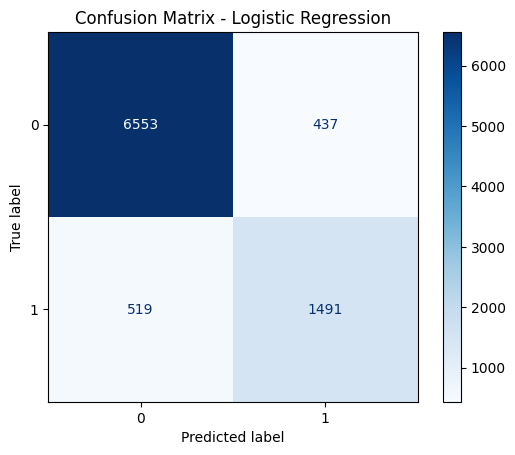

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Step 10: DEcision TRee

Decision Tree
[[6529  461]
 [ 420 1590]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6990
           1       0.78      0.79      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



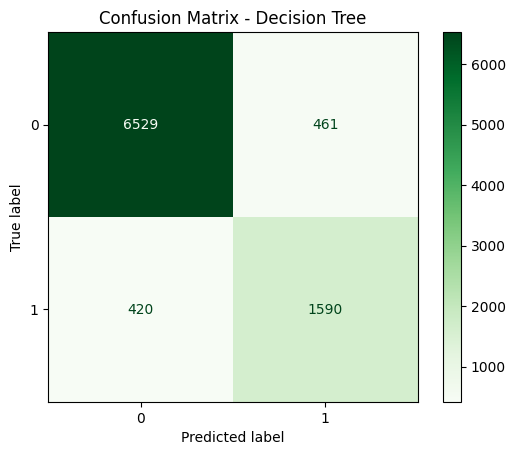

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Step 11: Random Forest

Random Forest
[[6808  182]
 [ 449 1561]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



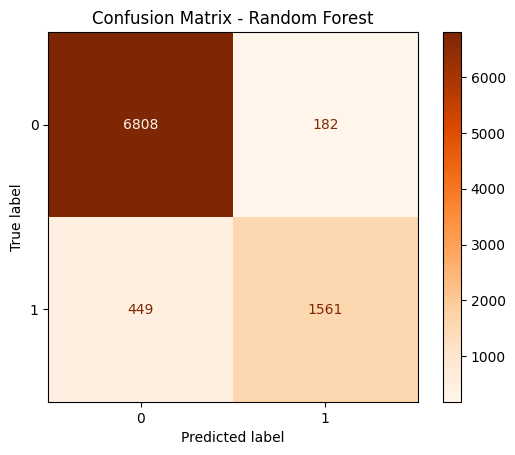

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Bonus: Apply SMOTE or compare with Random Forest.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

<Axes: ylabel='count'>

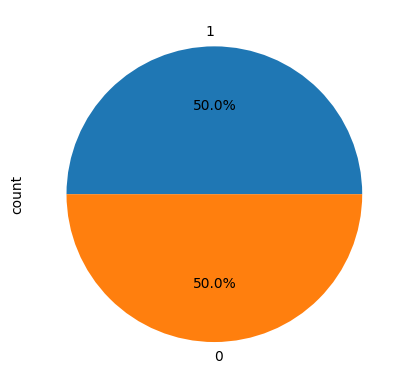

In [ ]:
y_res.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())

Before SMOTE: loan_status
0    28010
1     7990
Name: count, dtype: int64
After SMOTE: loan_status
1    35000
0    35000
Name: count, dtype: int64


In [ ]:
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_res, y_res)
y_pred_rf_smote = rf_smote.predict(X_test)

print("Random Forest with SMOTE")
print(confusion_matrix(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))

Random Forest with SMOTE
[[6990    0]
 [   0 2010]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6990
           1       1.00      1.00      1.00      2010

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

